NLP PROJECT 
. Emotion Detection in text 
. Text Classifier 

In [1]:
# load   pkgs

import pandas as pd
import numpy as np 
import  seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
! pip install neattext

You should consider upgrading via the 'c:\users\sangi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [3]:
# load Text  cleaning pkg     !pip install neattext 
import neattext.functions as nfx

In [4]:
  #load  ML pkgs
  # Estimators
  from sklearn.linear_model import LogisticRegression
  from sklearn.naive_bayes import MultinomialNB
  # Transformers 
  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [5]:
# load Dataset
df=pd.read_csv("emotion_dataset_2.csv")

In [6]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df.drop(columns='Clean_Text', axis=1, inplace=True)
df.head()


,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [7]:
df.shape

(34792, 2)

In [8]:
# cheek the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [9]:
# cheek nullvalue 
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [10]:
# value counts
df["Emotion"].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:>

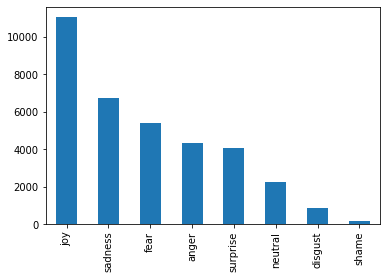

In [11]:
df["Emotion"].value_counts().plot(kind="bar")

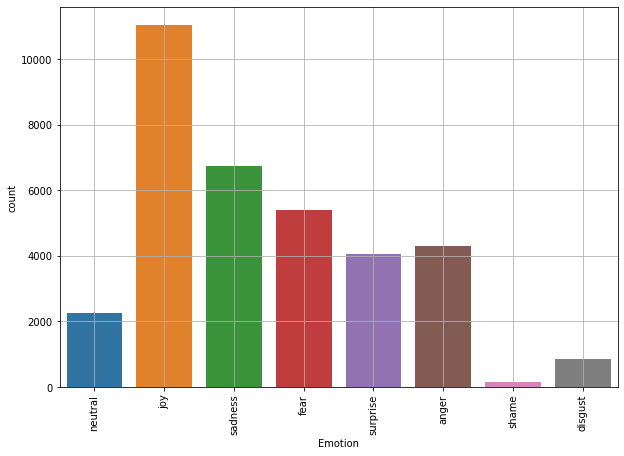

In [12]:
# plot 
plt.figure(figsize=(10,7))
sns.countplot(x="Emotion",data=df)
plt.xticks(rotation="vertical")
plt.grid(True)


In [13]:
# Data cleaning 
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [14]:
# user handles
df["Clean_text"] = df["Text"].apply(nfx.remove_userhandles)

In [15]:
# stopwords
df["Clean_text"] = df["Clean_text"].apply(nfx.remove_stopwords)

In [16]:
# special_characters
df["Clean_text"] = df["Clean_text"].apply(nfx.remove_special_characters)

In [17]:
df

,Emotion,Text,Clean_text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,anger,A man robbed me today .,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY Losing YOU


In [18]:
# split the x and y data 
x=df["Clean_text"]
y=df["Emotion"]

In [19]:
# split Data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [20]:
# bulid pipline
from sklearn.pipeline import Pipeline

#LogisticRegrattion Pipline
lr=Pipeline(steps=
                [("cv",CountVectorizer()),
                 ("lr",LogisticRegression())
                ]
            )

# train and fit data 
lr.fit(x_train,y_train)



c:\users\sangi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [21]:
# check the Accuracy 
lr.score(x_test,y_test)


0.6332630772178578

In [22]:
# make A prediction 
exl="This book was so interesting it made me  happy"

In [23]:
lr.predict([exl])

array(['joy'], dtype=object)

In [24]:
# To know the classes
lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [25]:
# save model & Pipline
import pickle
pipline_file= open ("emotion_classifier_lr.pkl","wb")
pickle.dump(lr,pipline_file)
pipline_file.close()